II. Programming

Francisco Silva (110409) and Joana Cardoso (109864)

5.

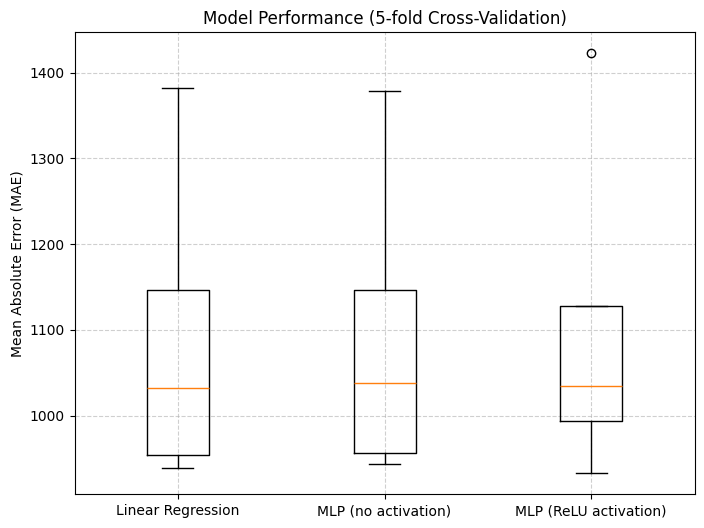

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("rent.csv")

X = data.drop(columns=["price"])
y = data["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    "Linear Regression": LinearRegression(),
    "MLP (no activation)": MLPRegressor(hidden_layer_sizes=(5, 5),
                                        activation='identity',
                                        max_iter=1000,
                                        early_stopping=True,
                                        random_state=42),
    "MLP (ReLU activation)": MLPRegressor(hidden_layer_sizes=(5, 5),
                                          activation='relu',
                                          max_iter=1000,
                                          early_stopping=True,
                                          random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=mae_scorer)
    results[name] = -scores

plt.figure(figsize=(8, 6))
plt.boxplot(results.values(), tick_labels=results.keys())
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Performance (5-fold Cross-Validation)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


6.

Analisando o Boxplot vemos que o  MLP Relu demonstrou ser o modelo mais preciso, apresentando um menor MAE médio que a Regressão Linear. O facto de o MLP relu ter superado a Regressão Linear indica que a relação entre as features e o preço do aluguer neste dataset não é estritamente linear e beneficia da capacidade de modelação avançada que o MLP oferece.

É importante notar que a caixa do MLP Relu é mais estreita do que a da Regressão Linear. Isto significa que, para muitos dos seus resultados, o erro foi mais consistente. No entanto, o seu bigode superior é significativamente mais alto pois houve um outlier num dos folds da cross-validation.

O elemento chave que diferencia o MLP da Regressão Linear é a função de ativação Relu. A introdução da relu tem o impacto de permitir não-linearidade ao MLP através da função max(0, x) em cada neurónio, ao contrário da RL que é limitada apenas a relações de linhas retas. Sem a Relu, um MLP seria apenas uma série de transformações lineares, que no final seria basicamente uma única RL. A importância da Relu reside precisamente em quebrar essa linearidade, o que permite ao MLP aprender a aproximar qualquer função complexa. No contexto dos resultados do Boxplot, a Relu foi essencial porque permitiu ao modelo ir além das relações lineares simples da RL e capturar as interações não-lineares no dataset que são necessárias para reduzir o erro de previsão, provando assim a sua superioridade e eficácia.


7.

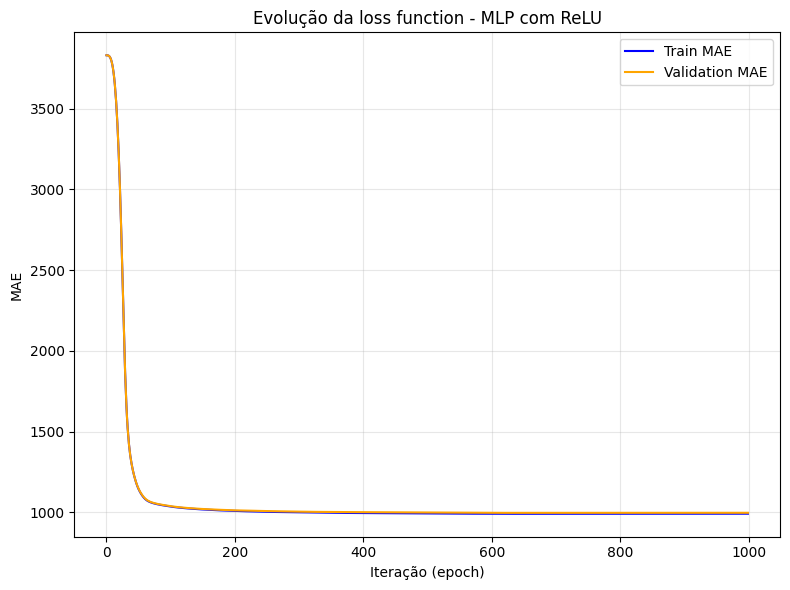

In [ ]:
import warnings
warnings.filterwarnings("ignore")

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_losses = []
val_losses = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    fold_train_loss = []
    fold_val_loss = []
    
    mlp = MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        solver='adam',
        random_state=42,
        early_stopping=True,
        warm_start=True
    )
    
    for i in range(250):
        mlp.fit(X_train, y_train)
        y_train_prediction = mlp.predict(X_train)
        y_val_prediction = mlp.predict(X_val)

        train_loss = mean_absolute_error(y_train, y_train_prediction)
        val_loss = mean_absolute_error(y_val, y_val_prediction)

        fold_train_loss.append(train_loss)
        fold_val_loss.append(val_loss)
    
    train_losses.append(fold_train_loss)
    val_losses.append(fold_val_loss)

train_losses = np.array(train_losses)
val_losses = np.array(val_losses)

mean_train = train_losses.mean(axis=0)
mean_val = val_losses.mean(axis=0)

plt.figure(figsize=(8,6))
plt.plot(mean_train, label='Train MAE', color='blue')
plt.plot(mean_val, label='Validation MAE', color='orange')
plt.xlabel('Iteração (epoch)')
plt.ylabel('MAE')
plt.title('Evolução da loss function - MLP com ReLU')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

O gráfico demonstra que o MLP com ativação Relu tem uma boa generalização pois as linhas da MAE de treino está próxima da linha da MAE de Validação. Embora o erro de treino seja ligeiramente inferior (um sinal de overfitting), esta diferença é mínima em comparação com a magnitude do erro. O facto de o MAE se manter sempre próximo de 1000, que é um valor baixo e excelente para o dataset em questão, valida que o modelo tem uma excelente capacidade de prever os resultados.